In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


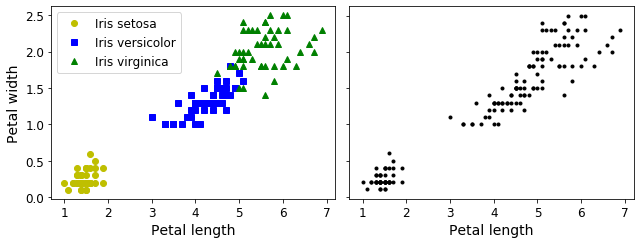

In [6]:

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

In [7]:
### Gaussian Mixture Model

from sklearn.mixture import GaussianMixture

# predict the clusters
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])





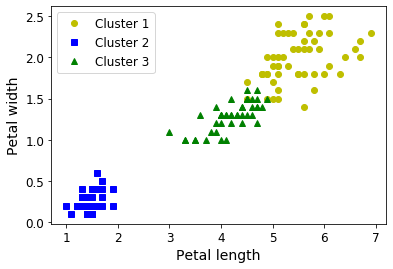

In [8]:
# plot the results
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [9]:
# correct predicted instances
np.sum(y_pred == y)


0

In [10]:
# % of correct 
np.sum((y_pred == y) / len(y_pred))

0.0

### 9.1.1 K-Means


In [11]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2,  2.3],
     [-1.5,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


Saving figure blobs_plot


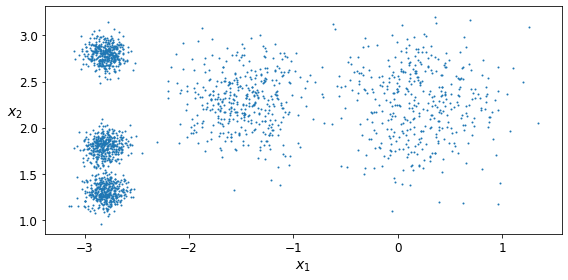

In [12]:
# plot the cluster

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

In [13]:
from sklearn.cluster import KMeans

# Fit and Predict

# train a K-Means clusterer, find centers and assign instances to center
k= 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


In [14]:
y_pred

array([4, 1, 0, ..., 3, 0, 1])

In [15]:
y_pred is kmeans.labels_

True

In [16]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [17]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

kmeans.predict(X_new)

array([0, 0, 3, 3])

In [18]:
### plotting the decision boundaries ( Voronoi Tesselate)

In [19]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


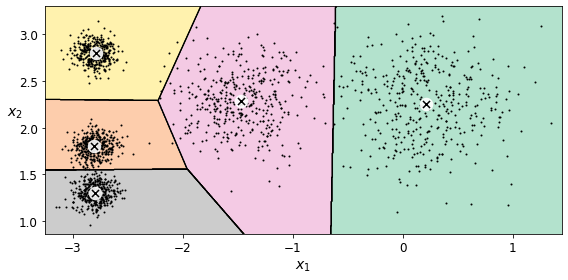

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

### Hard Clustering vs. Soft

measure the distance to each centroid (of each instance)


In [21]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [22]:
## K_Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.
    
The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.
    
Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [23]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

Saving figure kmeans_algorithm_plot


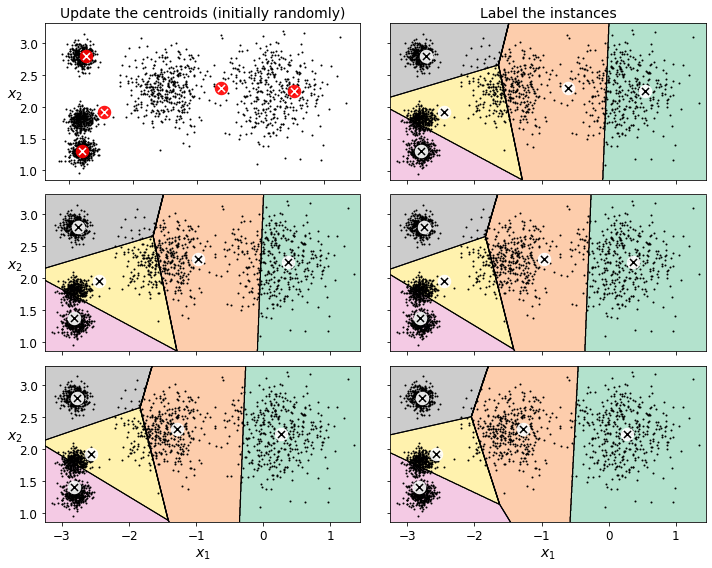

In [24]:
# plot the iterations of kmeans clusterer

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()


In [25]:
### Inertia

# mean squared distance - as performance metric
kmeans.inertia_

# .score() returns neg. inertia (sind utility function must follow 'greater is better' rule
kmeans.score(X)

-211.59853725816845

### Multiple Initializations

When you set the `n_init` hyperparameter, 
Scikit-Learn runs the original algorithm `n_init` 
times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [26]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

### K-Means++

In [27]:
# controlled by hyperparameter init
# k-Means++ by David Arthur default

KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
### Accelerated K-Means

# Elkan method using triangle inequality
# algorithm= 'elkan' (or 'full' slower)

%timeit -n 50 KMeans(algorithm='elkan').fit(X)

122 ms ± 7.52 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Accelerated K-Means

- using triangle inequality
- algorithm = 'elkan'


### Mini Batch K-Means

- learning in batches (simpler solution if data too big for memory -> use memmap class



In [29]:
%timeit -n 50 KMeans(algorithm='elkan').fit(X)

%timeit -n 50 KMeans(algorithm='full').fit(X)


from sklearn.cluster import MiniBatchKMeans

mini_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
mini_kmeans.fit(X)

130 ms ± 7.05 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)
171 ms ± 5.45 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

If the dataset does not fit in memory, the simplest option is to use the `memmap` class, just like we did for incremental PCA in the previous chapter. First let's load MNIST:

In [30]:
import urllib
from sklearn.datasets import fetch_openml

# get the MNIST Data and convert labels to int64
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

# write to 'memmap'
filename = 'my_mnist.data'
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=100, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

If your data is so large that you cannot use `memmap`, things get more complicated. Let's start by writing a function to load the next batch (in real life, you would load the data from disk):

In [31]:
# function to load data

def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

# train model by feeding one batch at a time 
# (impl. mulitipl initializations & retain model with lowest inertia)

np.random.seed(42)

k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans
        
best_kmeans.score(X)

-211.70999744411483

In [32]:
# Mini Batch much faster but worse performance (higher inertia)

100/100Saving figure minibatch_kmeans_vs_kmeans


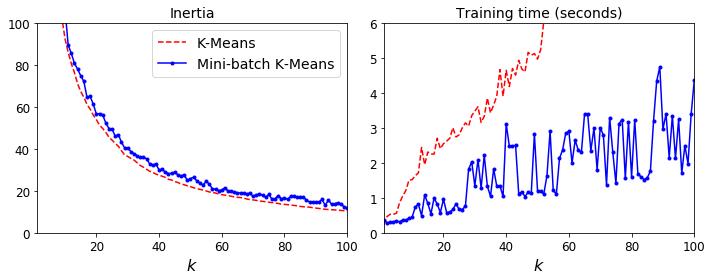

In [33]:
# 1) calculate computing time with each inertia (for KMean and Mini-Batch)

from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_
    
# 2) plot the data for comparison

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

### Finding the optimal number of clusters

1) inertia
- the higher k the lower inertia
- finding the sweet spot at inflexion point / elbow of inertia as a function of k diagramm

2) silhouette score

- mean silhouette coefficient over all instances
- highest silh. score best (if plotted knife-shaped (height = number in cluster, width= close to optimum)



### 9.1.2 Limits of K-Means

- need number of centroid (k)
- initiatzion method tricky (local optimum)
- not working when elliptical clusters (or other non-spherical)

### 9.1.3 Using Clustering for Image Segmentation



In [39]:
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

# read the image 
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

# reshape image for clusterer
X = image.reshape(-1, 3)

# create and train clusterer
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img


array([[0.02091756, 0.10598001, 0.00559016],
       [0.02091756, 0.10598001, 0.00559016],
       [0.02091756, 0.10598001, 0.00559016],
       ...,
       [0.09118783, 0.24308221, 0.01513819],
       [0.09118783, 0.24308221, 0.01513819],
       [0.02091756, 0.10598001, 0.00559016]], dtype=float32)

Saving figure image_segmentation_diagram


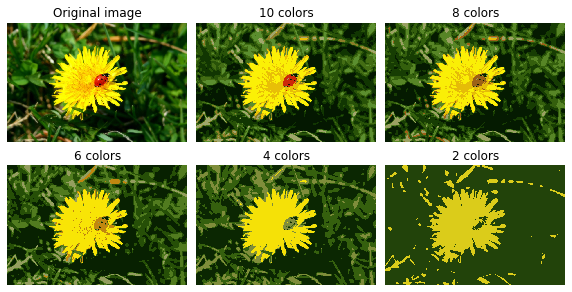

In [40]:
# reshape segmented_img to original shape

segmented_img = segmented_img.reshape(image.shape)

# create data for 10, 8, etc. color centroids
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
    
# plot the data
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

In [ ]:
### 9.1.4 Using Clustering for Preprocessing




In [41]:
# get data

from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

# split data train test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [44]:
# train LogReg Model anc evaluate (score()) Model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', 
                             max_iter=5000, random_state=42)

log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9688888888888889

this is baseline accuracy of 96.9%

now we create Pipeline, cluster the images with KMeans k=50 and train the logReg with distance to nearest cluster 

In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters= 50, random_state=42)),
    ('logreg', LogisticRegression(multi_class= 'ovr', max_iter=5000, solver='lbfgs', random_state=42))
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.98

In [47]:
# difference in accuracy to logReg before

1- (1- 0.9777) / (1- 0.968888)

0.28323476472100906

How about that? We reduced the error rate by over 28%! But we chose the number of clusters $k$ completely arbitrarily, we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of $k$ is simply the one that results in the best classification performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(50, 200))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] kmeans__n_clusters=50 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ kmeans__n_clusters=50, total=   5.1s
[CV] kmeans__n_clusters=50 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] ............................ kmeans__n_clusters=50, total=   5.3s
[CV] kmeans__n_clusters=50 ...........................................
[CV] ............................ kmeans__n_clusters=50, total=   5.8s
[CV] kmeans__n_clusters=51 ...........................................
[CV] ............................ kmeans__n_clusters=51, total=   8.9s
[CV] kmeans__n_clusters=51 ...........................................
[CV] ............................ kmeans__n_clusters=51, total=   6.1s
[CV] kmeans__n_clusters=51 ...........................................
[CV] ............................ kmeans__n_clusters=51, total=   5.5s
[CV] kmeans__n_clusters=52 ...........................................
[CV] ............................ kmeans__n_clusters=52, total=   5.8s
[CV] kmeans__n_clusters=52 ...........................................
[CV] ............................ kmeans__n_clusters=52, total=   5.1s
[CV] kmeans__n_clusters=52 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=69, total=   4.7s
[CV] kmeans__n_clusters=70 ...........................................
[CV] ............................ kmeans__n_clusters=70, total=   5.3s
[CV] kmeans__n_clusters=70 ...........................................
[CV] ............................ kmeans__n_clusters=70, total=   4.9s
[CV] kmeans__n_clusters=70 ...........................................
[CV] ............................ kmeans__n_clusters=70, total=   5.5s
[CV] kmeans__n_clusters=71 ...........................................
[CV] ............................ kmeans__n_clusters=71, total=   4.8s
[CV] kmeans__n_clusters=71 ...........................................
[CV] ............................ kmeans__n_clusters=71, total=   5.9s
[CV] kmeans__n_clusters=71 ...........................................
[CV] ............................ kmeans__n_clusters=71, total=   5.3s
[CV] kmeans__n_clusters=72 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=89, total=   6.5s
[CV] kmeans__n_clusters=89 ...........................................
[CV] ............................ kmeans__n_clusters=89, total=   8.3s
[CV] kmeans__n_clusters=89 ...........................................
[CV] ............................ kmeans__n_clusters=89, total=   5.7s
[CV] kmeans__n_clusters=90 ...........................................
[CV] ............................ kmeans__n_clusters=90, total=   5.9s
[CV] kmeans__n_clusters=90 ...........................................
[CV] ............................ kmeans__n_clusters=90, total=   5.5s
[CV] kmeans__n_clusters=90 ...........................................
[CV] ............................ kmeans__n_clusters=90, total=   5.2s
[CV] kmeans__n_clusters=91 ...........................................
[CV] ............................ kmeans__n_clusters=91, total=   5.8s
[CV] kmeans__n_clusters=91 ...........................................
[CV] .

[CV] ........................... kmeans__n_clusters=108, total=   7.5s
[CV] kmeans__n_clusters=108 ..........................................
[CV] ........................... kmeans__n_clusters=108, total=   8.8s
[CV] kmeans__n_clusters=109 ..........................................
[CV] ........................... kmeans__n_clusters=109, total=   8.1s
[CV] kmeans__n_clusters=109 ..........................................
[CV] ........................... kmeans__n_clusters=109, total=   9.1s
[CV] kmeans__n_clusters=109 ..........................................
[CV] ........................... kmeans__n_clusters=109, total=   7.2s
[CV] kmeans__n_clusters=110 ..........................................
[CV] ........................... kmeans__n_clusters=110, total=   5.6s
[CV] kmeans__n_clusters=110 ..........................................
[CV] ........................... kmeans__n_clusters=110, total=   7.2s
[CV] kmeans__n_clusters=110 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=127, total=   5.3s
[CV] kmeans__n_clusters=128 ..........................................
[CV] ........................... kmeans__n_clusters=128, total=   5.9s
[CV] kmeans__n_clusters=128 ..........................................
[CV] ........................... kmeans__n_clusters=128, total=   6.8s
[CV] kmeans__n_clusters=128 ..........................................
[CV] ........................... kmeans__n_clusters=128, total=   4.7s
[CV] kmeans__n_clusters=129 ..........................................
[CV] ........................... kmeans__n_clusters=129, total=   6.4s
[CV] kmeans__n_clusters=129 ..........................................
[CV] ........................... kmeans__n_clusters=129, total=   6.8s
[CV] kmeans__n_clusters=129 ..........................................
[CV] ........................... kmeans__n_clusters=129, total=   4.7s
[CV] kmeans__n_clusters=130 ..........................................
[CV] .

In [50]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [ ]:
grid_clf.score(X_test, y_test)

### 9.1.5 Clustering for Semi-Supervised Learning

- using clusters to label (manually) only a few, but closest to centroid. less tedious manuall work

- possible to propagate labels (all or only 20% closest to centroid)

1. model with n=50 labeled
2. model with cluster and label the image closes to centroid
3. Propagate

In [ ]:
# 1. Model with n = 50 labeled images

n_labeled = 50

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', 
                             random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

In [ ]:
# 2. Model with clusters (k = 50) and closest image to clustered labeled manually

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [ ]:
# plot those instances so we can label them

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [ ]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

like before only 50 labeled instances, 
but those labels representative image of its cluster

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)